# Topic: Predicting Heart Disease with help of ML

With the help of various python based machine learning and data science tools we're going to analyse and train the data. Then we'll make an attempt to build a machine learning model based on our information. The ML model will help us to predict whether someone has heart disease or not.

## Steps we're going to follow-

1. Problem Defination
2. Data
3. Analysis
4. Evaluation
5. Features
6. Modelling
6. Experimentation

### 1. Problem Defination:

> Given the clinical information about the patient, can we predict whether they has heart disease or not ?

### 2. Data

**2.1 Where do we get the data from ?**
- This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date.

- Link : https://archive.ics.uci.edu/ml/datasets/heart+disease 

**2.2 Given information about the data**

1. age: age in years
2. sex: sex (1 = male; 0 = female) 
3. cp: chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl 
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. thalach: maximum heart rate achieved 
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosop
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing 

**2.3 Any special note**

### 3. Evaluation

> If we can reach up to 95% accuracy at predicting whether or not a patient has heart disease during our experiment, then only we'll pursue further.

## 4. Features

- Detailed information about each features of the data
- Thorough research about the data
- Talking to a subject expert can help too

### Creating Data Dictionary

1. age: age in years
2. sex: sex (1 = male; 0 = female) 
3. cp: chest pain type
    - 0: typical angina
    - 1: atypical angina
    - 2: non-anginal pain
    - 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl 
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. thalach: maximum heart rate achieved 
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosop
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing 


## 5 Analysing and Working the data 

### 5.1 Preparing the tools

In [1]:
# Import all the tools we need

# Regular EDA tools and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-Learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation Tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

### 5.2 Load the data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape # To check the shape of data set (rows, columns)

(303, 14)

### 5.3 Data Exploration (EDA)

The goal is to know more about given data and to become a subject matter expert of the dataset.

1. What questions are we trying to solve ?
2. What kind of data do we have and how do we treat different data types ?
3. What's missing from the data  and how can we deal with that ?
4. Where are the out;iers and why should we care about them ?
5. How can we add, change or remove featrues to get more out of our data ?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# How many of each class are there in target column?
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

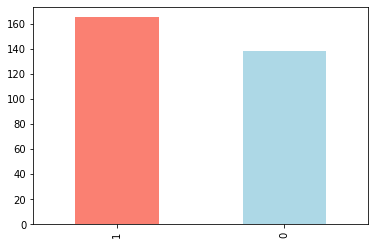

In [6]:
df["target"].value_counts().plot(kind='bar', color=["salmon", "lightblue"]);

In [7]:
# General Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Statistical info about data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Check for NA or missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

### 5.4 Finding Patterns

#### 1. Heart Disease frequency with respect to Sex

In [11]:
# Sex ratio od Male and Female
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


We can infer from this comparision that Women has more chance to have heart disease as per this dataset.

Women - Almost 75% Probality of havind diseae
Men - Almost 50% Probability of having disease
Almost 60% Probablity for both genders to have a diseae

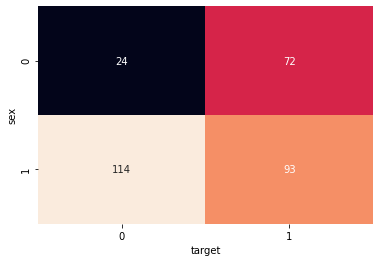

In [13]:
# Visualise this crosstab data

sns.heatmap(pd.crosstab(df.sex, df.target),annot=True, cbar=False, fmt="d");

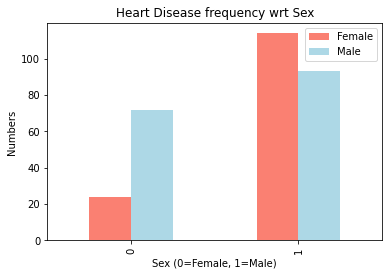

In [14]:
# Visualise this crosstab data
pd.crosstab(df.sex, df.target).plot(kind='bar', color=["salmon", "lightblue"]);
plt.title("Heart Disease frequency wrt Sex")
plt.xlabel("Sex (0=Female, 1=Male)")
plt.ylabel("Numbers")
plt.legend(["Female","Male"]);

#### 2. Heart Disease frequency with respect to Chest Pain Type

In [15]:
# Heart Pain Type ratio of patients
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [16]:
# Compare target column with chest pain column
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


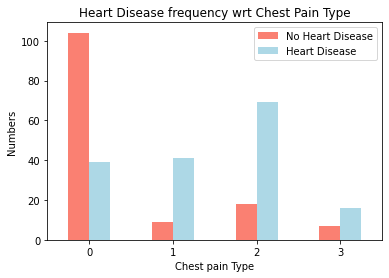

In [17]:
# Visualise this crosstab data
pd.crosstab(df.cp, df.target).plot(kind='bar', color=["salmon", "lightblue"]);
plt.title("Heart Disease frequency wrt Chest Pain Type")
plt.xlabel("Chest pain Type")
plt.ylabel("Numbers")
plt.legend(["No Heart Disease", "Heart Disease"]);
plt.xticks(rotation=0);

#### 2. Age vs Max Heart Rate for Heart Disease

In [18]:
df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
65     8
55     8
61     8
53     8
45     8
43     8
42     8
50     7
66     7
48     7
46     7
49     5
47     5
70     4
39     4
68     4
35     4
69     3
40     3
38     3
71     3
37     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64

In [19]:
df.thalach.value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

The length varies a lot so we'll plot a scatter plat instead of bar.

We also need to plot two sepearet plot

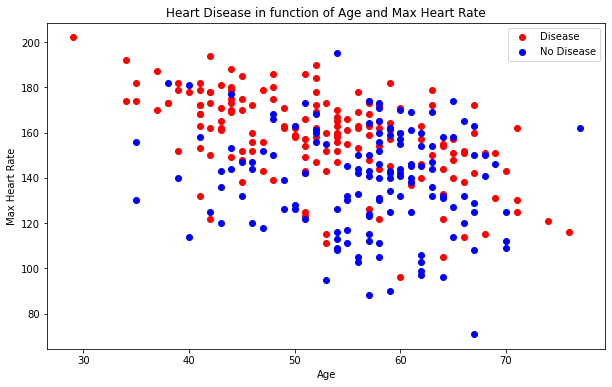

In [20]:
# Visualise

plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target ==1],
            color="red");

# Scatter with negetive examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            color="blue");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

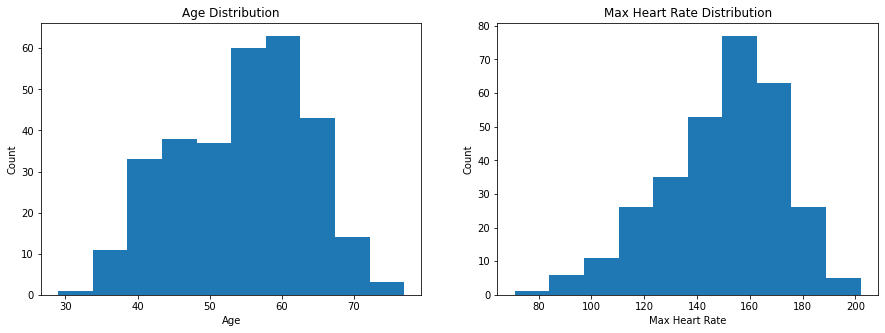

In [21]:
# Distribution of Age and Max Heart Rate

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

# For Age
ax1.hist(df.age)
ax1.set(title="Age Distribution", xlabel="Age", ylabel="Count")

ax2.hist(df.thalach)
ax2.set(title="Max Heart Rate Distribution", xlabel="Max Heart Rate", ylabel="Count");


#### Make a Correlation Matrix

In [22]:
# TO see the correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


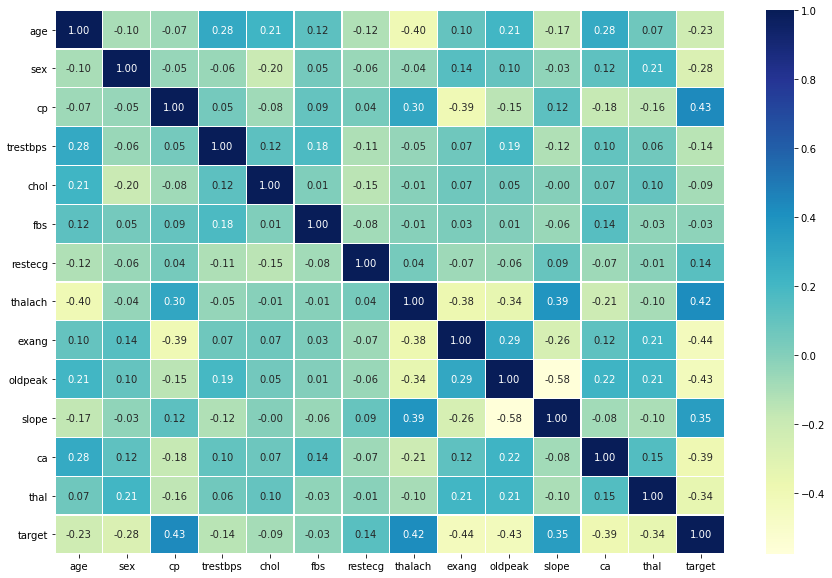

In [23]:
# Visualise the Correlation Matrix
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidth=0.2, fmt=".2f", cmap="YlGnBu");

In [24]:
# Confirm negetive correlation between exang and target

pd.crosstab(df.exang, df.target)

target,0,1
exang,,
0,62,142
1,76,23


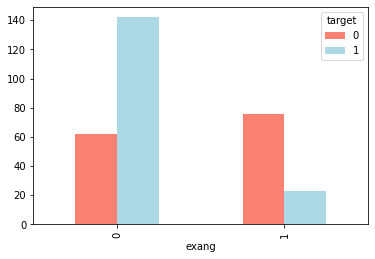

In [25]:
# Visualise the Negetive Correlation
pd.crosstab(df.exang, df.target).plot(kind="bar", color=["salmon","lightblue"]);

In [26]:
# Confirm positive correlation between slope and target

pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


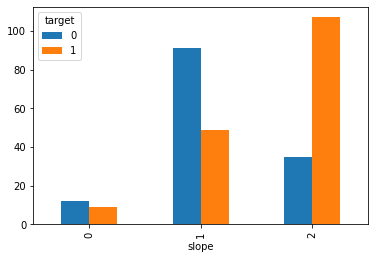

In [27]:
# Visualise the positive correlation
pd.crosstab(df.slope, df.target).plot(kind="bar");

## 6. Modelling

In [28]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2,1


### 6.1 Split our data into X and y

In [29]:
X = df.drop("target", axis=1)
y = df.target

In [30]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### 6.2 Split our data into training and test split

In [32]:
# To save the set
np.random.seed(1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
# Check the shape and size
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 6.3 Build A Machine Learning Model

We'll try three models for our model experiment

1. Logistic Regression
2. K-Nearest Neighbour Classifier
3. Random Forest Classfier

In [34]:
# Put models in a dictionary

models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

In [35]:
# Createa function to fit and score the models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate the given machine learning model.
    models : Any Scikit-learn ML model
    X_train : Training Data (No Lables)
    X_test : Testing Data (No Lables)
    y_train : Training Data (Lables)
    y_test : Testing Data (Labels)
    """
    
    # Setup a seed
    np.random.seed(1)
    
    # Make a dictionary to keep the model score
    model_scores = {}
    
    #Loop through models
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        #Evaluate the model
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [36]:
# Evaluate the different models

model_scores = fit_and_score(models, X_train, X_test,y_train, y_test)
model_scores

/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.8032786885245902}

In [37]:
# Model Comarision

model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
Accuracy,0.770492,0.57377,0.803279


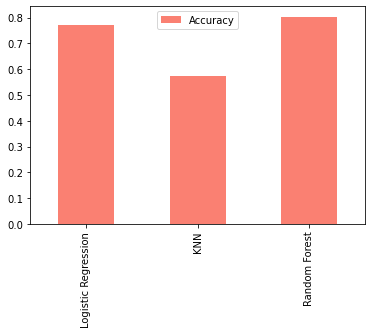

In [38]:
# Visualise the Comparison Chart

model_compare.T.plot(kind="bar", color="salmon");

## 7. Experimentaion

**We need to work on the following sections-**

* Hyperparameter Tuning
* Feature Importance

**We need nee these Evaluation Metrices**

1. Cross Validation
2. Confusion Matrix
3. Classification Report
4. ROC Curve and AUC Value
5. Accuracy
6. Precision
7. Recall
8. F1 Score

### 7.1 Hyperparameter Tuning

#### 1. Tune KNN Model

In [39]:
# Tune KNN Model

train_scores = []
test_scores = []

# Creata a list of different values of n_neighbours
neighbours = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Make a loop
for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithmn
    knn.fit(X_train, y_train)
    # Update Train score
    train_scores.append(knn.score(X_train, y_train))
    #Update Test Score
    test_scores.append(knn.score(X_test, y_test))

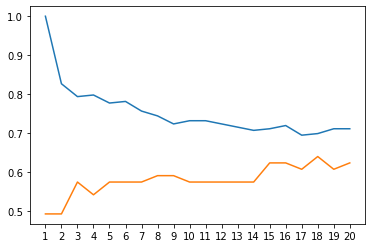

In [40]:
plt.plot(neighbours, train_scores, label="Train Score")
plt.plot(neighbours, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1));

In [41]:
# Tune KNN Model

train_scores = []
test_scores = []

# Creata a list of different values of n_neighbours
neighbours = range(1,51)

# Setup KNN instance
knn = KNeighborsClassifier()

# Make a loop
for i in neighbours:
    knn.set_params(leaf_size=i)
    
    # Fit the algorithmn
    knn.fit(X_train, y_train)
    # Update Train score
    train_scores.append(knn.score(X_train, y_train))
    #Update Test Score
    test_scores.append(knn.score(X_test, y_test))

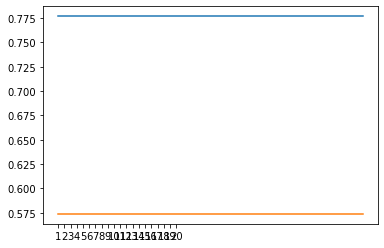

In [42]:
plt.plot(neighbours, train_scores, label="Train Score")
plt.plot(neighbours, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1));

In [43]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 50,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [44]:
# Lets Try Grid Search CV for KNN

knn_params = {"n_neighbors": np.arange(1,21,1),
             "leaf_size": np.arange(1,51,1),
             "p": [1,2]}

model = GridSearchCV(KNeighborsClassifier(),
                   knn_params,
                   cv=5)

model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'p': [1, 2]})

In [45]:
model.best_params_

{'leaf_size': 13, 'n_neighbors': 6, 'p': 1}

In [46]:
model.score(X_test,y_test)

0.7049180327868853

We got a result boost of 13%, but its still not good enough.
So we'll try the other two..

#### 2. Tune Logistic Regression with Grid Search CV

In [47]:
log_reg = LogisticRegression()
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [48]:
# Tune Logistic Regression

log_params = {"solver": ['newton-cg', 'lbfgs', 'liblinear'],
             "penalty": ['l2'],
             "C": np.logspace(-4,4,50)}

model = GridSearchCV(LogisticRegression(),
                   log_params,
                   cv=5)

model.fit(X_train,y_train)

/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/buzzzer/Desktop/ml-sam-project-1/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.685113...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [49]:
model.best_params_

{'C': 0.2682695795279725, 'penalty': 'l2', 'solver': 'lbfgs'}

In [50]:
model.score(X_test, y_test)

0.7704918032786885

#### 2. Tune Random Forest with Randomised Search CV

In [51]:
ran_for = RandomForestClassifier()
ran_for.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [52]:
# Tune Random Forest

log_params = {"n_estimators": np.arange(10,1000,50),
              "max_features" : ['auto', 'sqrt'],
              "max_depth" : [None,10,20,30,40,50,60,70,80,90,100],
             "min_samples_split" : np.arange(2, 20, 2),
             "min_samples_leaf" : np.arange(1, 20, 1)}

model = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=log_params,
                           n_iter=100,
                           cv=5)

model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])})

In [53]:
model.best_params_

{'n_estimators': 360,
 'min_samples_split': 10,
 'min_samples_leaf': 19,
 'max_features': 'auto',
 'max_depth': 30}

In [54]:
model.score(X_test,y_test)

0.7868852459016393

In [55]:
model_scores

{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.8032786885245902}

## 8. Evaluation our best metrices

In [56]:
# Make a prediction
y_preds = model.predict(X_test)

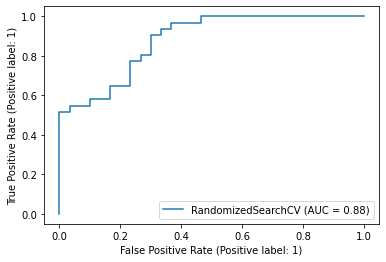

In [57]:
# Make a ROC Curve

plot_roc_curve(model,X_test,y_test);

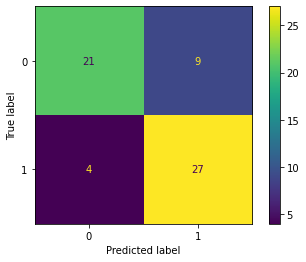

In [58]:
# Make a Confusion Matrix

plot_confusion_matrix(model,X_test,y_test);

In [59]:
# Make a Classification Report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        30
           1       0.75      0.87      0.81        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



### Cross Validated Metrices

In [60]:
# Check the best parameters

model.best_params_

{'n_estimators': 360,
 'min_samples_split': 10,
 'min_samples_leaf': 19,
 'max_features': 'auto',
 'max_depth': 30}

In [61]:
# Make a new model with that parameters

model = RandomForestClassifier(n_estimators=160,
                               min_samples_split=6,
                               min_samples_leaf=18,
                               max_features='sqrt',
                               max_depth=90)


In [70]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7868852459016393

In [63]:
# Import cross validated score
from sklearn.model_selection import cross_val_score

In [64]:
# Cross Validated Accuracy

cv_acc = cross_val_score(model,X, y, cv=5, scoring="accuracy" )
np.mean(cv_acc)

0.8447540983606558

In [66]:
# Cross validated Precision
cv_pre = cross_val_score(model, X, y, cv=5, scoring="precision")
np.mean(cv_pre)

0.8389954217817996

In [67]:
# Cross Validated Recall
cv_rec = cross_val_score(model, X, y, cv=5, scoring="recall")
np.mean(cv_rec)

0.8909090909090909

In [68]:
# Cross Validated F1
cv_f1 = cross_val_score(model, X, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.8573329275957307

In [75]:
# Make a dictionary for all these values

cv_values = {"Accuracy": np.mean(cv_acc),
            "Precision": np.mean(cv_pre),
            "Recall": np.mean(cv_pre),
            "F1": np.mean(cv_f1)}

cv_metrices = pd.DataFrame(cv_values, index=["Scores"])

In [76]:
cv_metrices

,Accuracy,Precision,Recall,F1
Scores,0.844754,0.838995,0.838995,0.857333


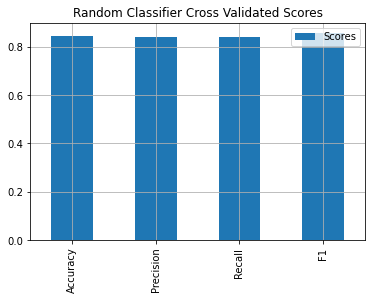

In [79]:
cv_metrices.T.plot(kind="bar", grid=True, title="Random Classifier Cross Validated Scores");

### Feature Importance

Which features contributed most to the outcome of the model and how did they contributed ?

1. To search feature imporatnce for each model sepearately

#### Feature imporatnce of Random Forest Model

In [83]:
# 1. Inbuilt Method
model.feature_importances_

array([0.04835074, 0.03185327, 0.22468362, 0.0065696 , 0.02394689,
       0.        , 0.00641109, 0.11118467, 0.13826499, 0.11940073,
       0.0470959 , 0.15784113, 0.08439737])

In [87]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

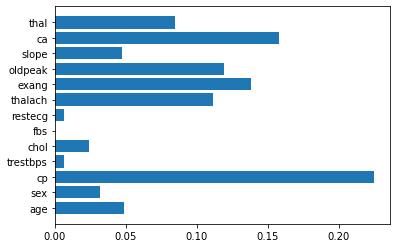

In [98]:
# Visualise the feature imporatnce

plt.barh(df.columns[:-1], model.feature_importances_ );

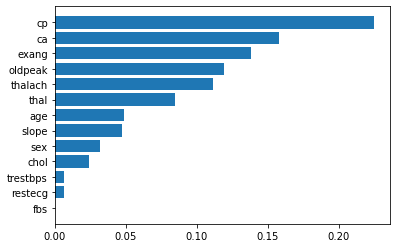

In [96]:
# Sorted 

sorted_val = model.feature_importances_.argsort()
plt.barh(df.columns[sorted_val], model.feature_importances_[sorted_val] );

In [100]:
# Another way to match features to columns

feature_dict = dict(zip(df.columns, list(model.feature_importances_)))
feature_dict

{'age': 0.04835073535310951,
 'sex': 0.031853269142701514,
 'cp': 0.2246836230657858,
 'trestbps': 0.006569601978484471,
 'chol': 0.02394688618617298,
 'fbs': 0.0,
 'restecg': 0.006411089626941069,
 'thalach': 0.11118467380627885,
 'exang': 0.13826498765224302,
 'oldpeak': 0.11940073228695917,
 'slope': 0.047095903421906005,
 'ca': 0.15784113003940403,
 'thal': 0.08439736744001373}

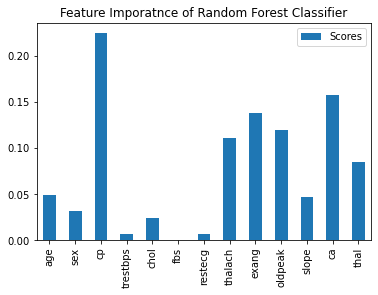

In [93]:
features_df = pd.DataFrame(feature_dict, index=["Scores"])

features_df.T.plot(kind="bar", title="Feature Imporatnce of Random Forest Classifier");

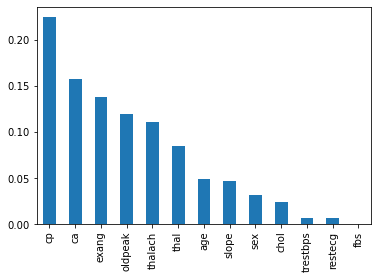

In [114]:
features_df.T["Scores"].sort_values(ascending=False).plot(kind="bar");

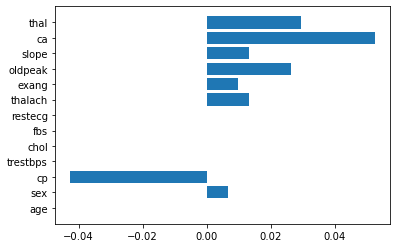

In [116]:
# 2 With Permutation Importance

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test)
plt.barh(df.columns[:-1], perm_importance.importances_mean );

Text(0.5, 0, 'Permutation Importance')

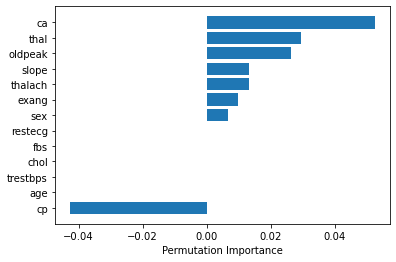

In [117]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [118]:
!pip install shap --q

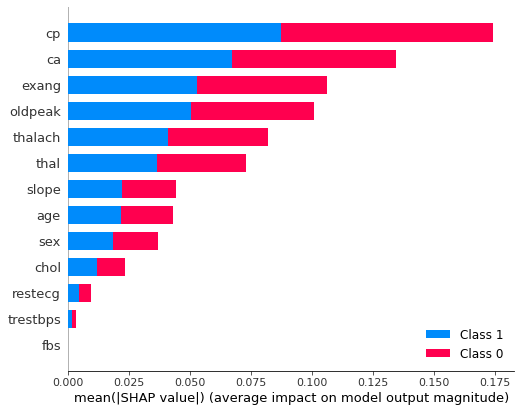

In [119]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar");

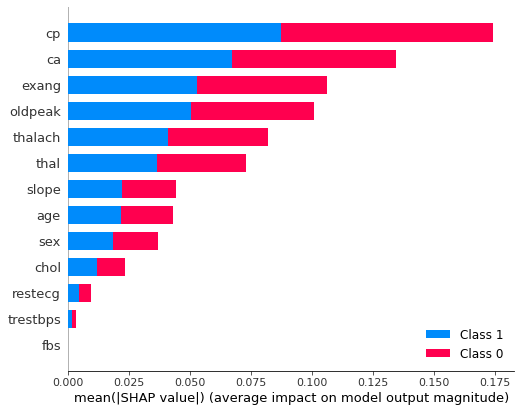

In [120]:
# With mode details
shap.summary_plot(shap_values, X_test);

### Summarise and Evaluate  

**If you haven't reach the desired score. What can we do next ?**

* Could we collect more data ?
* Could we tray a better model ? Like CatBoost or XGBoost
* Could we improve the current model (beyond what we have done) ?

**If we have met then**
* How to share it with others ?
* How to document it ?